Import libraries

In [1]:
library(tidyverse)
library(xts)
library(tbl2xts)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [3]:
df = read_csv("datasets/csvs_per_year/madrid_2001.csv", show_col_types = FALSE)
for (i in 2002:2018){
    url = paste("datasets/csvs_per_year/madrid_", i, ".csv", sep='')
    df = bind_rows(df, read_csv(url, show_col_types = FALSE))  
}

df = df %>%
    select(date, CO, NO_2, SO_2, PM10) %>%
    group_by(date) %>% summarise(across(
        .cols = where(is.numeric), 
        .fns = list(Mean = mean), na.rm = TRUE, 
        .names = "{col}"
        ))

df.xts = tbl_xts(df)

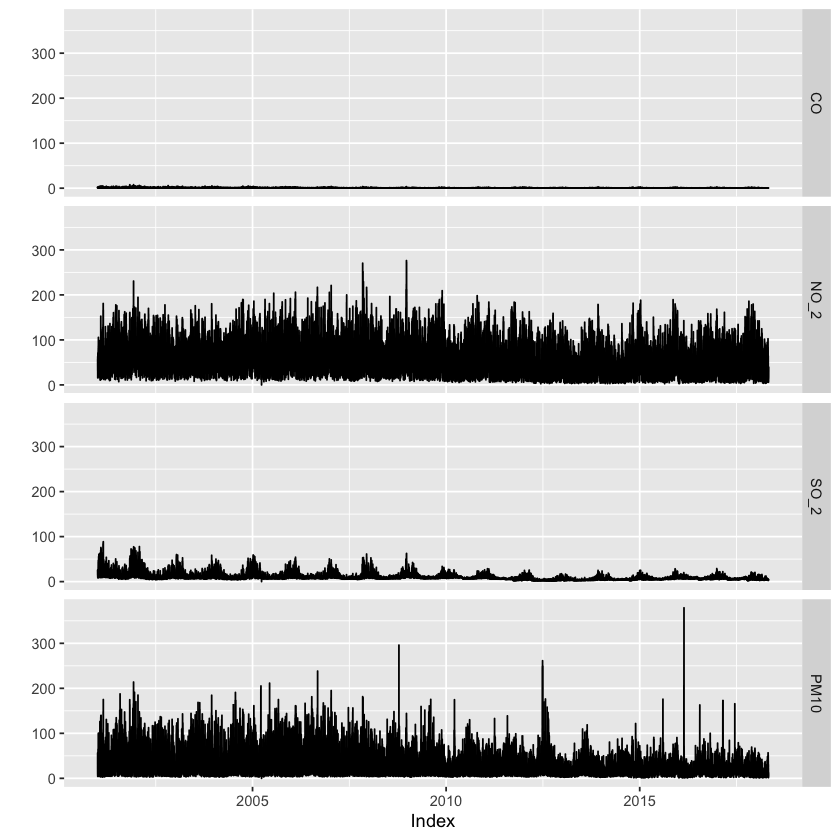

In [4]:
autoplot(df.xts)